In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df = pd.read_excel('ozon_data.xlsx')
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

X = df.drop(columns=['Decmc']) 
y = df['Decmc']

In [4]:
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=23)

In [6]:
np.shape(X_train)

(290, 6)

In [7]:
gbm_model = GradientBoostingRegressor(loss='squared_error', random_state=23)

In [8]:
param_grid = {
    'n_estimators': [100, 200, 500],      # Ağaç sayısı
    'learning_rate': [0.01, 0.05, 0.2],  # Öğrenme oranı
    'max_depth': [3, 5, 7],          # Maksimum derinlik
    'subsample': [0.8, 1.0],         # Örnekleme oranı
    'max_features': ['sqrt', 'log2']  # Ağaç başına kullanılacak maksimum özellik
}

In [9]:
grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=23),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]},
             verbose=2)

In [10]:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 1.0}


In [11]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [12]:
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

c:\Users\GOKTUG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\GOKTUG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
print("Eğitim verileri için metrikler")
print(f'Eğitim RMSE: {rmse_train}')
print(f'Eğitim MAPE: {mape_train}')
print(f'Test MSE: {mse_test}')
print(f'Eğitim R^2: {r2_train}')
print('-----------------------------')
print("Test verileri için metrikler")
print(f'Test RMSE: {rmse_test}')
print(f'Test MAPE: {mape_test}')
print(f'Test MSE: {mse_test}')
print(f'Test R^2: {r2_test}')

Eğitim verileri için metrikler
Eğitim RMSE: 0.36403324518315033
Eğitim MAPE: 5.445154272957489
Test MSE: 0.17815359207676787
Eğitim R^2: 0.9971880298316658
-----------------------------
Test verileri için metrikler
Test RMSE: 0.4220824470133387
Test MAPE: 5.106106057794834
Test MSE: 0.17815359207676787
Test R^2: 0.9957403006315224


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

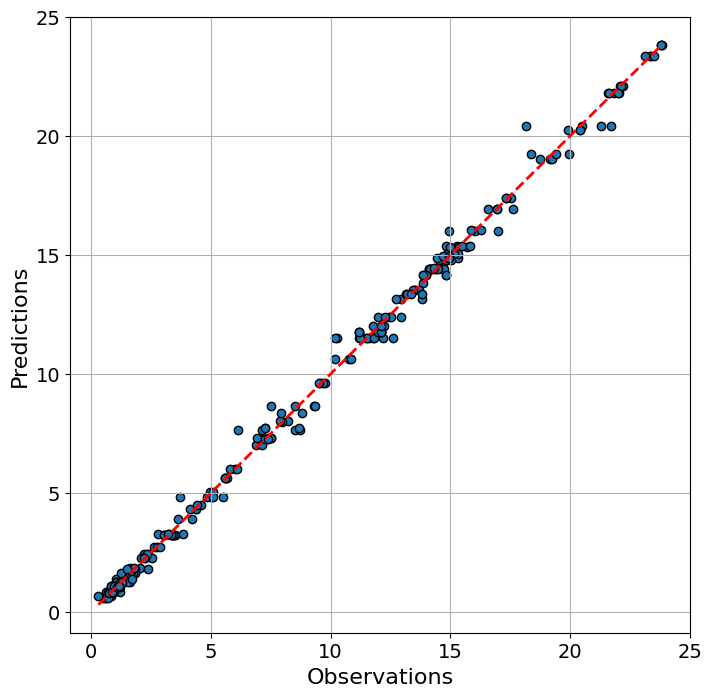

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel('Observations', fontsize=16) 
plt.ylabel('Predictions', fontsize=16) 
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

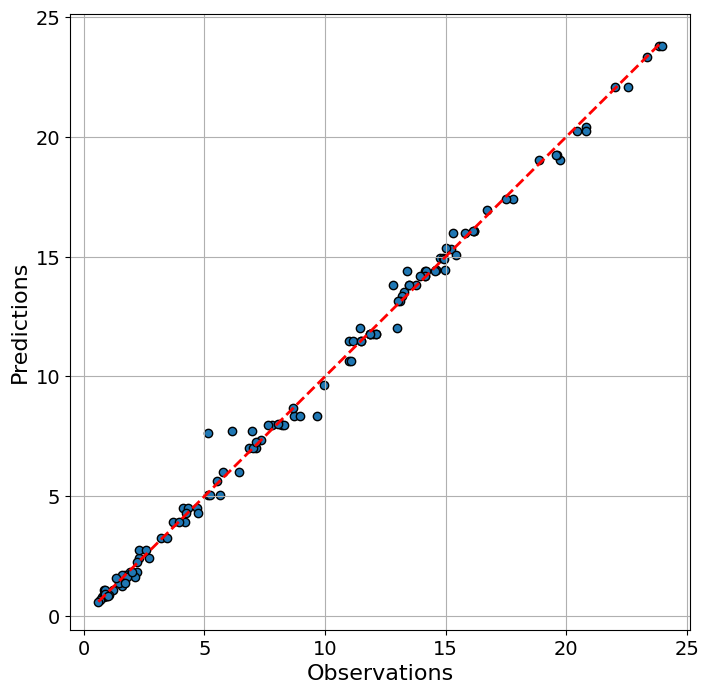

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Observations', fontsize=16) 
plt.ylabel('Predictions', fontsize=16) 
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)